## Занятие 3. Предварительная обработка данных и отбор признаков
### Kirill Zakharov

Веберите любые данные из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и проведите предварительную обработку данных и отбор признаков в соответствии со следующей схемой. Комментарии к каждому разделу обязательны.

## Предварительная обработка данных

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [3]:
filename = 'wine.csv'
data = pd.read_csv(filename)
data = data.interpolate()
data.head(6)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


### Rescale data

In [4]:
from sklearn.preprocessing import MinMaxScaler

array = data.values
# separate array into input and output components
X = array[:,1:13]
Y = array[:,0]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
np.set_printoptions(precision=3)
data0 = pd.DataFrame(rescaledX, columns=data.columns[1:])
data0.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942,0.5
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391,0.5
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.5
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362,0.5
5,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348,0.5


Вручную

In [5]:
data0 = data.copy()
data0 = data.iloc[:, 1:data0.shape[1]-1]
min1 = data0.min()
max1 = data0.max()
for i in range(data0.shape[1]):
    data0.iloc[:, i] = (data0.iloc[:, i] - min1[i])/(max1[i] - min1[i])

data0.head(6) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
5,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348


Как видно по графику ниже данные масштабировались в отрезок [0,1]

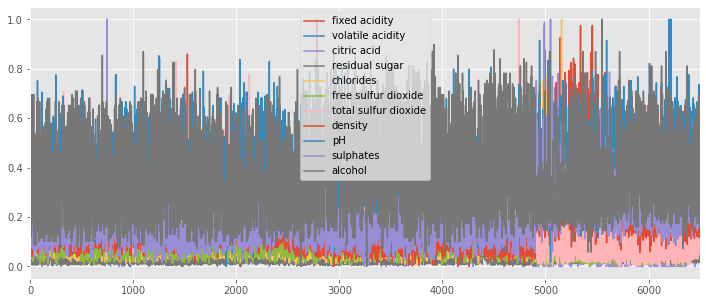

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))
data0.iloc[:, :].plot(ax=ax)
plt.show()

### Standardize data

In [7]:
from sklearn.preprocessing import StandardScaler

std_model = StandardScaler()
new_data = std_model.fit_transform(X)
data1 = pd.DataFrame(new_data, columns=data.columns[1:])
data1.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.166461,-0.423436,0.284639,3.206723,-0.315076,0.815565,0.959976,2.102214,-1.359851,-0.546042,-1.418558,0.207999
1,-0.706593,-0.241179,0.146965,-0.808028,-0.200885,-0.931107,0.287618,-0.232332,0.507595,-0.277236,-0.831615,0.207999
2,0.682317,-0.362683,0.559986,0.306013,-0.172337,-0.029599,-0.331660,0.134525,0.258603,-0.613243,-0.328521,0.207999
3,-0.012138,-0.666445,0.009292,0.642327,0.056045,0.928254,1.243074,0.301278,-0.177135,-0.882049,-0.496219,0.207999
4,-0.012138,-0.666445,0.009292,0.642327,0.056045,0.928254,1.243074,0.301278,-0.177135,-0.882049,-0.496219,0.207999
5,0.682317,-0.362683,0.559986,0.306013,-0.172337,-0.029599,-0.331660,0.134525,0.258603,-0.613243,-0.328521,0.207999


Вручную

In [8]:
data1 = data.copy()
means = data1.mean()
std = data1.std()
for i in range(1, data1.shape[1]-1):
    data1.iloc[:, i] = (data1.iloc[:, i] - means[i-1])/std[i-1]

data1.head(6)    

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,-0.166448,-0.423403,0.284617,3.206476,-0.315051,0.815503,0.959902,2.102052,-1.359746,-0.546000,-1.418449,6
1,white,-0.706538,-0.241160,0.146954,-0.807966,-0.200869,-0.931035,0.287595,-0.232314,0.507556,-0.277215,-0.831551,6
2,white,0.682265,-0.362655,0.559943,0.305989,-0.172324,-0.029596,-0.331634,0.134515,0.258583,-0.613196,-0.328496,6
3,white,-0.012137,-0.666393,0.009291,0.642277,0.056041,0.928182,1.242978,0.301255,-0.177121,-0.881982,-0.496181,6
4,white,-0.012137,-0.666393,0.009291,0.642277,0.056041,0.928182,1.242978,0.301255,-0.177121,-0.881982,-0.496181,6
5,white,0.682265,-0.362655,0.559943,0.305989,-0.172324,-0.029596,-0.331634,0.134515,0.258583,-0.613196,-0.328496,6


Как видно на графиках ниже все признаки имеют ожидание 0 и примерно стандартное отклонение 1.

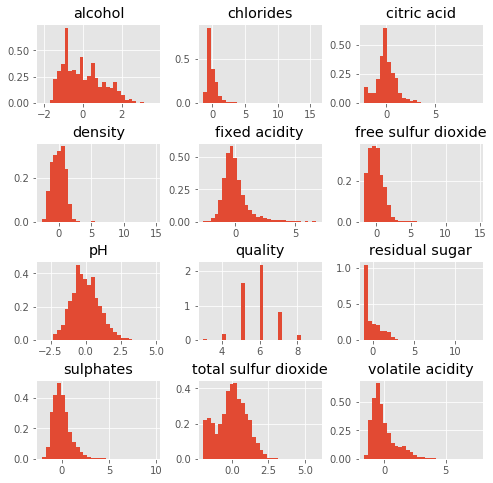

In [9]:
data1.hist(figsize=(8,8), density=True, layout=(4,3), bins=30, sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.5)
plt.show()

### Normalize data

In [10]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
new_data1 = norm.fit_transform(X)

data2 = pd.DataFrame(new_data1, columns=data.columns[1:])
data2.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.039424,0.001521,0.002028,0.116583,0.000253,0.253440,0.957441,0.005638,0.016896,0.002534,0.049562,0.033792
1,0.047219,0.002249,0.002548,0.011992,0.000367,0.104932,0.989359,0.007450,0.024734,0.003673,0.071204,0.044971
2,0.078777,0.002723,0.003890,0.067107,0.000486,0.291767,0.943382,0.009678,0.031705,0.004279,0.098228,0.058353
3,0.037393,0.001195,0.001662,0.044145,0.000301,0.244095,0.965995,0.005171,0.016567,0.002077,0.051416,0.031161
4,0.037393,0.001195,0.001662,0.044145,0.000301,0.244095,0.965995,0.005171,0.016567,0.002077,0.051416,0.031161
5,0.078777,0.002723,0.003890,0.067107,0.000486,0.291767,0.943382,0.009678,0.031705,0.004279,0.098228,0.058353


### Binarize data (Make Binary)

In [11]:
from sklearn.preprocessing import Binarizer

norm = Binarizer(threshold=0.0)
new_data1 = norm.fit_transform(X)

data2 = pd.DataFrame(new_data1, columns=data.columns[1:])
data2.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Отбор признаков

### Univariate Selection

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

unv_sel = SelectKBest(score_func=f_classif, k=3)
new_data2 = unv_sel.fit(X,Y)
np.set_printoptions(precision=3)
print(new_data2.scores_)
features = new_data2.transform(X)
# summarize selected features
print(features[:,:])
len(new_data2.scores_)

[2020.719 4828.949  235.815  900.41  2315.587 1858.136 6252.796 1169.655
  786.647 2021.997    7.068   93.812]
[[0.27 0.045 170.0]
 [0.3 0.049 132.0]
 [0.28 0.05 97.0]
 ...
 [0.51 0.076 40.0]
 [0.645 0.075 44.0]
 [0.31 0.067 42.0]]


12

### Recursive Feature Elimination

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [False  True False False  True False False  True False  True False False]
Feature Ranking: [4 1 3 5 1 9 8 1 2 1 6 7]


### Principle Component Analysis

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.954 0.041 0.005]
[[-7.420e-03 -1.185e-03  4.864e-04  4.102e-02 -1.682e-04  2.305e-01
   9.722e-01  1.772e-06 -6.534e-04 -7.045e-04 -5.452e-03 -5.327e-04]
 [-5.355e-03 -7.827e-04 -2.437e-04  1.871e-02  6.700e-05  9.726e-01
  -2.314e-01  1.282e-06  6.480e-04  3.453e-04  2.878e-03  9.152e-03]
 [ 2.366e-02  8.896e-04  1.920e-03  9.952e-01  1.758e-04 -2.720e-02
  -3.583e-02  4.607e-04 -6.887e-03 -1.930e-03 -8.269e-02 -8.798e-03]]


### Feature Importance

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
print(model.feature_importances_)

[0.073 0.146 0.04  0.068 0.119 0.045 0.279 0.087 0.038 0.077 0.017 0.011]
